In [1]:
# Import Neccessary Libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import time
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


pd.set_option('display.max_colwidth', 3000)
pd.set_option("display.max_rows", 100000)


In [2]:
import sklearn
sklearn.__version__

'0.24.1'

In [3]:
def read_pickle_files(filepath):
    with open(filepath, "rb") as f:
        return pickle.load(f)


def plot_roc_curve(class_dict, y_preds, y_truth, get_auc=True):
    plt.figure(figsize=(12, 9))
    auc_dict = dict()
    for (idx, c_label) in enumerate(class_dict.values()):
        fpr, tpr, thresholds = roc_curve(y_truth.iloc[:, idx].astype(int), y_preds[:, idx])
        plt.plot(fpr, tpr, label="{}: [AUC: {:.03f}]".format(c_label, auc(fpr, tpr)))
        auc_dict[c_label] = auc(fpr, tpr)
    # plt.legend()
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # fig.savefig('trained_net.png')
    plt.show()

    return auc_dict


def save_model(model, filepath):
    with open(filepath, "wb") as f:
        pickle.dump(model, f)
        
def load_model(filepath):
    with open(filepath, "rb") as f:
        return pickle.load(f)
        
        
# def data_scaler(df):
#     scaler = StandardScaler()
#     df = pd.DataFrame(scaler.fit_transform(df))
#     return df

In [4]:
print("Reading Features Data from Drive...")
#test_metadata = pd.read_csv(r"D:\Northeastern courses\CS 5100\Project\features\manual_features_test.csv")
#train_metadata = pd.read_csv(r"D:\Northeastern courses\CS 5100\Project\features\manual_features_train.csv")
#valid_metadata = pd.read_csv(r"D:\Northeastern courses\CS 5100\Project\features\manual_features_valid.csv")
#test_metadata = pd.read_csv("/Users/adithyaabhishek/Desktop/FAI5100/img_classify/manual_features_test.csv")
#train_metadata = pd.read_csv("/Users/adithyaabhishek/Desktop/FAI5100/img_classify/manual_features_train.csv")
#valid_metadata = pd.read_csv("/Users/adithyaabhishek/Desktop/FAI5100/img_classify/manual_features_valid.csv")

#features_df = pd.concat([train_metadata,test_metadata,valid_metadata])
#print(features_df.shape)
#del train_metadata
#del test_metadata
#del valid_metadata"""
features_df= pd.read_pickle("/Users/adithyaabhishek/Desktop/FAI5100/NIH_Chest_XRays_Disease_Detection-main/manual_features_v3.pkl")
# print("Dropping Unnecessary Columns")
# features_df.drop(columns=["disease_vec", "image_index"], axis=1, inplace=True)
print("Done!")

Reading Features Data from Drive...
Done!


In [5]:
# print("Scaling Data...")
# features_df = data_scaler(features_df)
# print("Done!")

In [6]:
features_df.head()


,0,1,2,3,4,5,6,7,8,9,...,3956,3957,3958,3959,3960,3961,3962,3963,3964,3965
0,0.362888,0.470691,0.240171,0.481349,0.284733,0.354421,0.209101,0.356834,0.864909,0.833420,...,0.513432,0.513432,0.429628,0.000000,0.638521,0.638521,0.578003,0.000000,0.576044,0.578003
1,0.365851,0.550785,0.327054,0.564258,0.278327,0.372016,0.232763,0.373907,0.868393,0.829795,...,0.048498,0.704167,0.706659,0.022759,0.027347,0.706659,0.905928,0.000000,0.000000,0.423432
2,0.247057,0.330994,0.176209,0.315490,0.198691,0.251121,0.150625,0.244143,0.904370,0.880522,...,0.017240,0.577264,0.660299,0.357784,0.000000,0.660299,0.707001,0.000000,0.017298,0.707001
3,0.242092,0.351545,0.212424,0.339922,0.218029,0.287156,0.183236,0.279555,0.893300,0.862507,...,0.000000,0.000000,0.992235,0.006155,0.002362,0.124199,0.649293,0.574106,0.482310,0.127272
4,0.414298,0.588992,0.324592,0.582940,0.283492,0.358744,0.213445,0.357196,0.869102,0.839061,...,0.542774,0.542774,0.707107,0.000000,0.000000,0.707107,0.914753,0.265128,0.195039,0.234296


In [7]:
features_df.shape

(112120, 3966)

In [8]:
print("Reading Class Dict...")
#class_dict = read_pickle_files(r"D:\Northeastern courses\CS 5100\Project\NIH_Chest_XRays_Disease_Detection\class_dict_wo_NF.pkl")
class_dict = read_pickle_files("/Users/adithyaabhishek/Desktop/FAI5100/img_classify/class_dict_wo_NF.pkl")
classes = list(class_dict.values())
print("Done!")

Reading Class Dict...
Done!


In [9]:
classes

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [10]:
print("Reading Metadata...")
#metadata = pd.read_csv(r"D:\Northeastern courses\CS 5100\Project\NIH_Chest_XRays_Disease_Detection\final_df_all_images_wo_NF_labels.csv")
metadata = pd.read_csv("/Users/adithyaabhishek/Desktop/FAI5100/NIH_Chest_XRays_Disease_Detection-main/final_df_all_images_wo_NF_labels.csv")
print("Extracting Disease Label Columns...")
labels_df = metadata[classes]
del metadata
print("Done!")

Reading Metadata...
Extracting Disease Label Columns...
Done!


In [11]:
labels_df.head()


,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [12]:
labels_df.shape

(112120, 14)

In [13]:
test_split = 0.01
train_split = 1-test_split
print("Splitting Data into Train ({}%) and Test ({}%) ...".format(train_split*100, test_split*100))
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=test_split, random_state=101, shuffle=True)
X_train, X_test = pd.DataFrame(X_train), pd.DataFrame(X_test)
print("Done!")

Splitting Data into Train (99.0%) and Test (1.0%) ...
Done!


## 1. LOGISTIC REGRESSION

In [ ]:
print("Fitting Logistic Regression Model with OVR Classifier...")
start = time.time()
ovr_logistic_regression = OneVsRestClassifier(LogisticRegression(n_jobs=-1,random_state=7,
                                                                 verbose=0,
                                                                 max_iter=200), n_jobs=-1)


ovr_logistic_regression.fit(X_train, y_train)
print("Done!")
print("Time Taken: {:.5f}".format(time.time()-start))

Fitting Logistic Regression Model with OVR Classifier...


In [16]:
#filepath = r"D:\Northeastern courses\CS 5100\Project\NIH_Chest_XRays_Disease_Detection\ML Models and Outputs\ovr_logistic_regression_manual_features.sav"
filepath = r"/Users/adithyaabhishek/Desktop/FAI5100/img_classify/ML Models and Outputs/ovr_logistic_regression_manual_features.sav"
save_model(ovr_logistic_regression, filepath)

In [25]:
filepath = "/Users/adithyaabhishek/Desktop/saved_models/ovr_logistic_regression_manual_features.sav"
ovr_logistic_regression = load_model(filepath)

Evaluating Model on Train Set...
Creating ROC Curve and computing AUC...


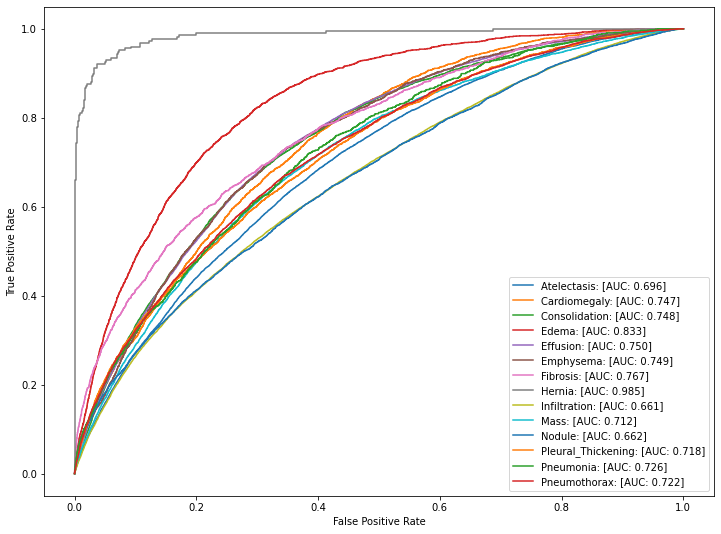

Done!


In [31]:
print("Evaluating Model on Train Set...")
y_preds = ovr_logistic_regression.predict_proba(X_train)

y_pred = np.array(y_preds)
ypreds = np.transpose([pred for pred in y_pred])
print("Creating ROC Curve and computing AUC...")
auc_dict = plot_roc_curve(class_dict, ypreds[1,:], y_train, get_auc=True)
print("Done!")

Evaluating Model on Test Set...
Creating ROC Curve and computing AUC...


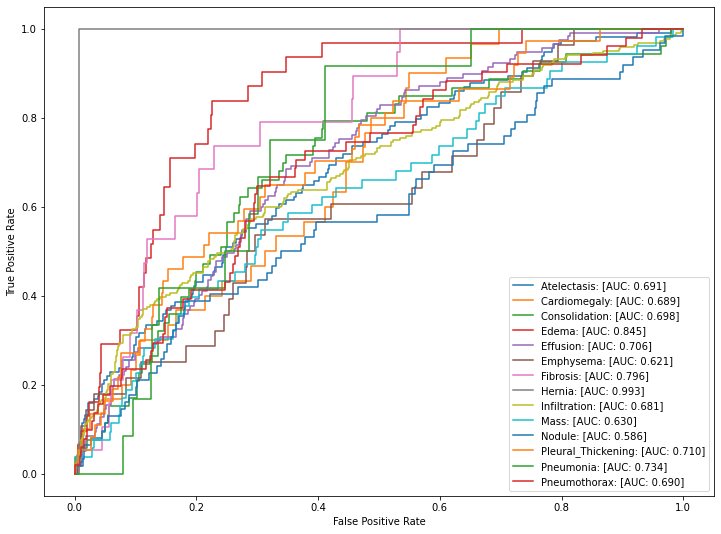

Done!


In [28]:
print("Evaluating Model on Test Set...")
y_preds = ovr_logistic_regression.predict_proba(X_test)

y_pred = np.array(y_preds)
ypreds = np.transpose([pred for pred in y_pred])
print("Creating ROC Curve and computing AUC...")
auc_dict = plot_roc_curve(class_dict, ypreds[1,:], y_test, get_auc=True)
print("Done!")


In [29]:
auc_dict

{'Atelectasis': 0.6908329852408801,
 'Cardiomegaly': 0.6894688644688645,
 'Consolidation': 0.6976543057345077,
 'Edema': 0.845096241979835,
 'Effusion': 0.7057702938299953,
 'Emphysema': 0.6212784016714546,
 'Fibrosis': 0.7964403301999332,
 'Hernia': 0.9928635147190009,
 'Infiltration': 0.6806345450206808,
 'Mass': 0.6299133381576858,
 'Nodule': 0.5862751065124772,
 'Pleural_Thickening': 0.7099265163781293,
 'Pneumonia': 0.7336336336336335,
 'Pneumothorax': 0.6903388806502995}

In [30]:
np.array(list(auc_dict.values())).mean()

0.7192947827283841

## 2. DECISION TREE

In [ ]:
print("Fitting Decision Tree Classifier...")
start = time.time()
dtree = DecisionTreeClassifier(criterion="gini",
                               random_state=7,
                               min_samples_leaf=70,
                               min_samples_split= 70,
                               max_depth=500)
dtree.fit(X_train, y_train)

filepath = r"/Users/adithyaabhishek/Desktop/saved_models/decision_tree_classifier_manual_features_v2.sav"
save_model(dtree, filepath)

print("Done!")
print("Time Taken: {:.5f}".format(time.time()-start))

Fitting Decision Tree Classifier...


In [ ]:
filepath = "/Users/adithyaabhishek/Desktop/saved_models/decision_tree_classifier_manual_features_v2.sav"
dtree = load_model(filepath)

In [ ]:
y_preds = dtree.predict_proba(X_train)
y_pred = np.array(y_preds)
y_preds = np.transpose([pred for pred in y_pred])
auc_dict = plot_roc_curve(class_dict, y_preds[1, :], y_train, get_auc=True)
print("Done!")

In [43]:
np.array(list(auc_dict.values())).mean()

0.8143437002579691

In [44]:
np.array(list(auc_dict.values()))

array([0.78796527, 0.81107969, 0.79841272, 0.86940515, 0.82781596,
       0.81597477, 0.82504382, 0.95180043, 0.7988143 , 0.75351357,
       0.75273622, 0.77390936, 0.82629964, 0.80804091])

In [30]:
y_preds = dtree.predict_proba(X_test)
y_pred = np.array(y_preds)
y_preds = np.transpose([pred for pred in y_pred])
auc_dict = plot_roc_curve(class_dict, y_preds[1, :], y_test, get_auc=True)
print("Done!")

ValueError: X has 3966 features, but DecisionTreeClassifier is expecting 830 features as input.

In [48]:
np.array(list(auc_dict.values())).mean()


0.6067382768525096

## 3. RANDOM FOREST


In [41]:
print("Fitting Random Forest Classifier...")
start = time.time()
rfc = RandomForestClassifier(max_features='sqrt',
                             n_estimators=50,
                             random_state=7)
rfc.fit(X_train, y_train)

filepath = r"/Users/adithyaabhishek/Desktop/FAI5100/NIH_Chest_XRays_Disease_Detection-main/random_forest_classifier_manual_features.sav"
save_model(rfc, filepath)

print("Done!")
print("Time Taken: {:.5f}".format(time.time()-start))

Fitting Random Forest Classifier...
Done!
Time Taken: 2993.05248


Evaluating Model on Test Set...
Creating ROC Curve and computing AUC...


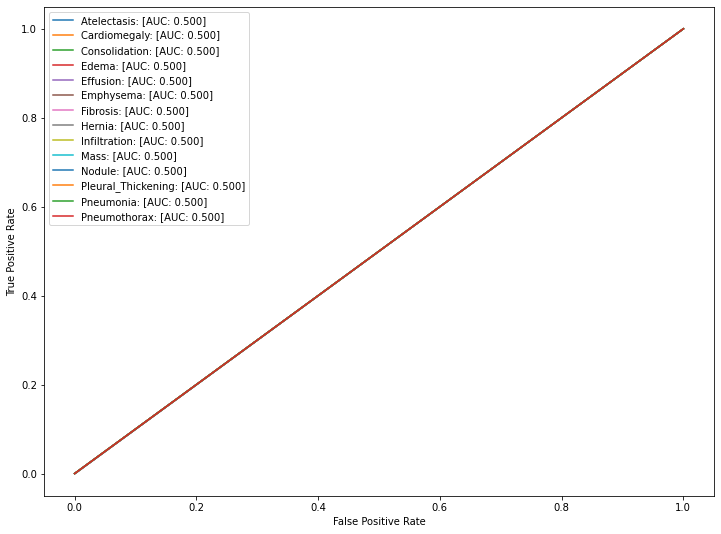

Done!


In [56]:
print("Evaluating Model on Test Set...")
y_preds = rfc.predict_proba(X_test)
print("Creating ROC Curve and computing AUC...")
auc_dict = plot_roc_curve(class_dict, y_preds, y_test, get_auc=True)
print("Done!")

## 4. NAIVE BAYES (BERNOULLI)

In [53]:
from sklearn.naive_bayes import BernoulliNB

print("Fitting Bernoulli Naive Bayes with OVR Classifier...")
start = time.time()
bernoulliNB = OneVsRestClassifier(BernoulliNB())


bernoulliNB.fit(X_train, y_train)
print("Done!")
print("Time Taken: {:.5f}".format(time.time()-start))

Fitting Bernoulli Naive Bayes with OVR Classifier...
Done!
Time Taken: 174.72555


In [22]:
filepath = "/Users/adithyaabhishek/Desktop/saved_models/bernoulliNB_manual_features.sav"
save_model(bernoulliNB, filepath)

NameError: name 'bernoulliNB' is not defined

In [26]:
filepath = "/Users/adithyaabhishek/Desktop/FAI5100/NIH_Chest_XRays_Disease_Detection-main/bernoulliNB_manual_features.sav"
bernoulliNB = load_model(filepath)

In [27]:
print("Evaluating Model on Train Set...")
y_preds = bernoulliNB.predict_proba(X_train)
print("Creating ROC Curve and computing AUC...")
auc_dict = plot_roc_curve(class_dict, y_preds, y_train, get_auc=True)
print("Done!")


Evaluating Model on Train Set...


KeyboardInterrupt: 

Evaluating Model on Test Set...
Creating ROC Curve and computing AUC...


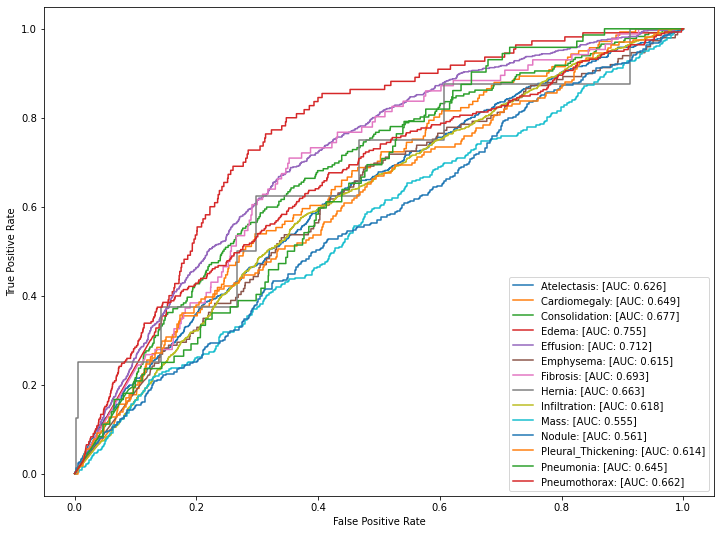

Done!


In [28]:
print("Evaluating Model on Test Set...")
y_preds = bernoulliNB.predict_proba(X_test)
print("Creating ROC Curve and computing AUC...")
auc_dict = plot_roc_curve(class_dict, y_preds, y_test, get_auc=True)
print("Done!")


In [29]:
np.array(list(auc_dict.values())).mean()

0.6460315276076234

## 5. NAIVE BAYES (GAUSSIAN)

In [14]:
from sklearn.naive_bayes import GaussianNB

print("Fitting Bernoulli Naive Bayes with OVR Classifier...")
start = time.time()
gaussianNB = OneVsRestClassifier(GaussianNB())


gaussianNB.fit(X_train, y_train)
print("Done!")
print("Time Taken: {:.5f}".format(time.time()-start))

Fitting Bernoulli Naive Bayes with OVR Classifier...
Done!
Time Taken: 78.16080


In [15]:
filepath = r"/Users/adithyaabhishek/Desktop/saved_models/gaussianNB_manual_features.sav"
save_model(gaussianNB, filepath)

In [17]:
gaussianNB = load_model("/Users/adithyaabhishek/Desktop/FAI5100/img_classify/ML Models and Outputs/gaussianNB_manual_features.sav")
print("Evaluating Model on Train Set...")
y_preds = gaussianNB.predict_proba(X_train)
print("Creating ROC Curve and computing AUC...")
auc_dict = plot_roc_curve(class_dict, y_preds, y_train, get_auc=True)
print("Done!")

Evaluating Model on Train Set...


KeyboardInterrupt: 

In [ ]:
np.array(list(auc_dict.values())).mean()

Evaluating Model on Test Set...
Creating ROC Curve and computing AUC...


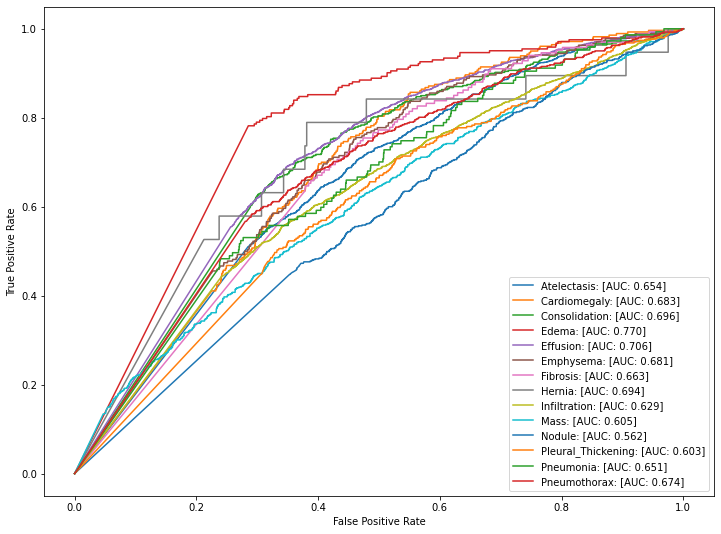

Done!


In [25]:
print("Evaluating Model on Test Set...")
y_preds = gaussianNB.predict_proba(X_test)
print("Creating ROC Curve and computing AUC...")
auc_dict = plot_roc_curve(class_dict, y_preds, y_test, get_auc=True)
print("Done!")


In [26]:
np.array(list(auc_dict.values())).mean()

0.6621459463959807

## 6. Extra Trees

In [19]:
print("Fitting Extra Trees Classifier...")
from sklearn.ensemble import ExtraTreesClassifier
start = time.time()
etc3 = ExtraTreesClassifier(n_jobs=-1,random_state=7, max_features='sqrt', n_estimators= 300, max_depth=300, criterion='gini',
                           min_samples_split=500, min_samples_leaf = 700)

etc3.fit(X_train, y_train)
print("Done!")
print("Time Taken: {:.5f}".format(time.time()-start))

#filepath = r"/Users/adithyaabhishek/Desktop/FAI5100/img_classify/ML Models and Outputs/extratrees_manual_features.sav"
#save_model(etc3, filepath)

Fitting Extra Trees Classifier...
Done!
Time Taken: 70.14995


Evaluating Model on Train Set...
Creating ROC Curve and computing AUC...


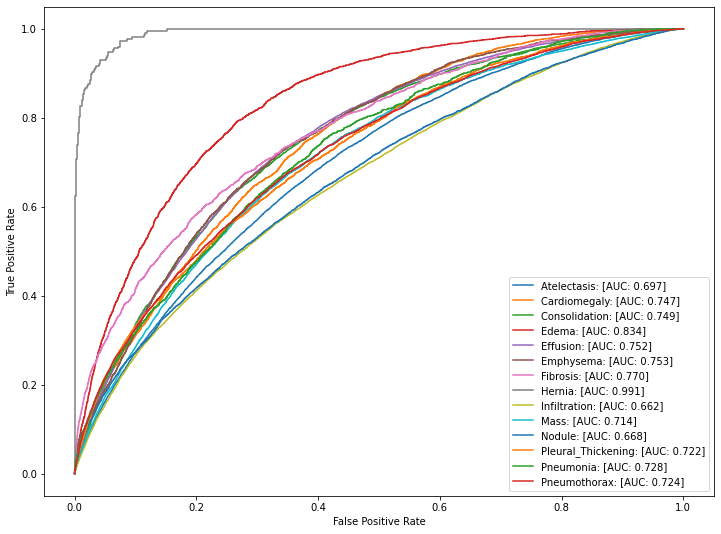

Done!


In [21]:
filepath = "/Users/adithyaabhishek/Desktop/saved_models/extratrees_manual_features.sav"
etcmodel = load_model(filepath)

print("Evaluating Model on Train Set...")
y_preds = etcmodel.predict_proba(X_train)
y_pred = np.array(y_preds)
ypreds = np.transpose([pred for pred in y_pred])
print("Creating ROC Curve and computing AUC...")
auc_dict = plot_roc_curve(class_dict, ypreds[1,:], y_train, get_auc=True)
print("Done!")

In [22]:
np.array(list(auc_dict.values())).mean()

0.7507265489673778

Evaluating Model on Test Set...
Creating ROC Curve and computing AUC...


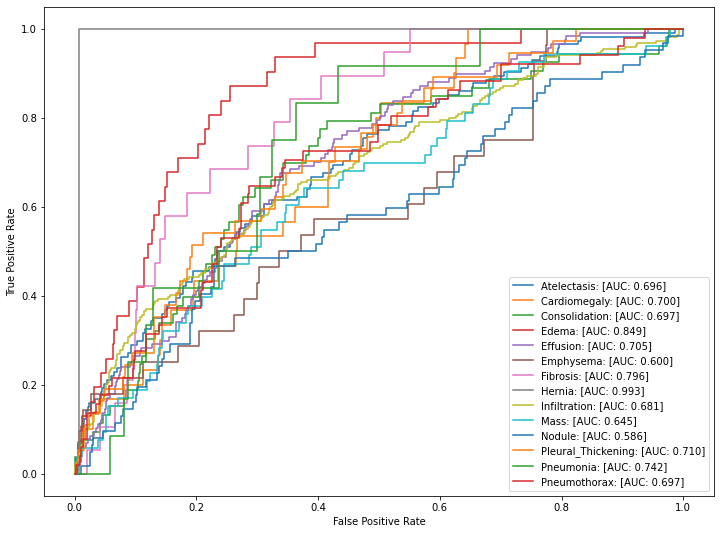

Done!


In [23]:
print("Evaluating Model on Test Set...")
y_preds = etcmodel.predict_proba(X_test)
y_pred = np.array(y_preds)
ypreds = np.transpose([pred for pred in y_pred])
print("Creating ROC Curve and computing AUC...")
auc_dict = plot_roc_curve(class_dict, ypreds[1,:], y_test, get_auc=True)
print("Done!")

In [24]:
np.array(list(auc_dict.values())).mean()

0.7211603215620459